# **Self Organizing Maps in Knowledge Retention Detection**



In [274]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules.minisom import MiniSom
from pylab import bone, pcolor, colorbar
from sklearn.preprocessing import MinMaxScaler

In [275]:
PATH = 'D:\\Portfolio\\RadixEngineeringSoftware\\AvaliacaoMaturidade\\data'
data_perfect = pd.read_excel(os.path.join(PATH, 'survey_anserws_perfect.xlsx'))
data_perfect.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,5,5,5,5,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,5,5,5,5,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5
4,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,1


In [276]:
# feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_perfect)
x_sc = scaler.transform(data_perfect)

In [277]:
# create the object and fit the mode
N = int(np.sqrt(5 * np.sqrt(x_sc.shape[0]))) 
print(f'Lado do Mapa: {N}')

Lado do Mapa: 10


In [278]:
# train the model - the size of the map was chosen based 
# on the recommendations of the creators of the packages
som = MiniSom(x=N, y=N, input_len=x_sc.shape[1], sigma=N-1, learning_rate=0.5)
som.random_weights_init(x_sc)
som.train_random(x_sc, num_iteration=200)

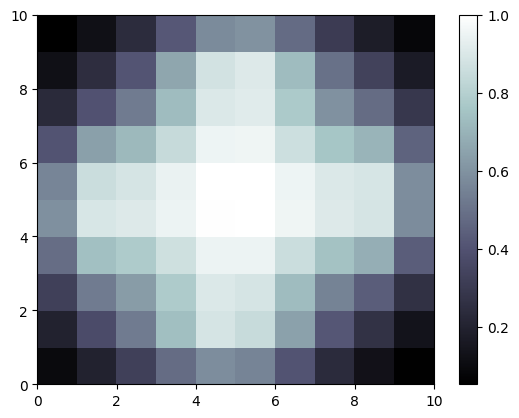

In [279]:
# visualize the results
bone()
pcolor(som.distance_map().T)
colorbar()

In [280]:
# get distances map
distances = som.distance_map()

# get winning neurons for each sample
dist_i = []
coord_list = []
for i in range(x_sc.shape[0]):

    # get winning neuron coordinates
    coord = som.winner(x=x_sc[i])

    # get average interneuron distance
    dist_i.append(distances[coord])
    coord_list.append(coord)

# append distances column to dataset
data_perfect['aid'] = dist_i
data_perfect['coord'] = coord_list

In [281]:
data_perfect

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,aid,coord
0,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,1,0.058382,"(9, 0)"
1,1,1,1,1,5,5,5,5,1,1,1,1,1,1,1,1,0.081641,"(9, 9)"
2,1,1,1,1,1,1,1,1,5,5,5,5,1,1,1,1,0.096646,"(0, 0)"
3,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,0.052379,"(0, 9)"
4,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,1,0.058382,"(9, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,0.052379,"(0, 9)"
508,5,5,5,5,1,1,1,1,1,1,1,1,1,1,1,1,0.058382,"(9, 0)"
509,1,1,1,1,5,5,5,5,1,1,1,1,1,1,1,1,0.081641,"(9, 9)"
510,1,1,1,1,1,1,1,1,5,5,5,5,1,1,1,1,0.096646,"(0, 0)"


In [282]:
som.winner(x=np.repeat(1, x_sc.shape[1]))

(4, 4)

In [283]:
distances[som.winner(x=np.repeat(1, x_sc.shape[1]))]

0.9961312878121568

In [284]:
data = pd.read_excel(os.path.join(PATH, 'survey_anserws.xlsx'))
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,5,5,4,5,4,3,3,4,4,5,5,3,2,3,3,2
1,5,5,5,5,3,3,3,5,4,5,4,3,1,1,3,3
2,5,4,5,5,5,5,4,4,3,4,4,4,3,1,3,2
3,5,4,5,5,4,5,3,4,3,4,3,4,3,2,3,3
4,4,4,5,4,5,3,5,4,3,5,5,4,3,1,3,1


In [285]:
# scale the new data and pass it through the trained map
x_sc = scaler.transform(data)

# get winning neurons for each sample
dist_i = []
coord_list = []
for i in range(x_sc.shape[0]):

    # get winning neuron coordinates
    coord = som.winner(x=x_sc[i])

    # get average interneuron distance
    dist_i.append(distances[coord])
    coord_list.append(coord)

# append distances column to dataset
data['coord'] = coord_list

In [286]:
def distancia_euclidiana(ponto1, ponto2):
    """Calcula a distância euclidiana entre dois pontos."""
    x1, y1 = ponto1
    x2, y2 = ponto2

    # Fórmula da distância euclidiana: sqrt((x2 - x1)^2 + (y2 - y1)^2)
    distancia = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distancia


data['dist1'] = data['coord'].apply(distancia_euclidiana, ponto2 = (0, 0))
data['dist2'] = data['coord'].apply(distancia_euclidiana, ponto2 = (0, 9))
data['dist3'] = data['coord'].apply(distancia_euclidiana, ponto2 = (9, 0))
data['dist4'] = data['coord'].apply(distancia_euclidiana, ponto2 = (9, 9))

data['dist_total'] = data[['dist1', 'dist2', 'dist3', 'dist4']].sum(axis=1)

for i in range(1, 5):
    data[f'dist{i}'] /= data['dist_total']

data.drop(columns=['dist_total'], inplace=True)

In [287]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,coord,dist1,dist2,dist3,dist4
0,5,5,4,5,4,3,3,4,4,5,...,3,2,3,3,2,"(5, 2)",0.203046,0.324348,0.168621,0.303985
1,5,5,5,5,3,3,3,5,4,5,...,3,1,1,3,3,"(5, 2)",0.203046,0.324348,0.168621,0.303985
2,5,4,5,5,5,5,4,4,3,4,...,4,3,1,3,2,"(7, 4)",0.303985,0.324348,0.168621,0.203046
3,5,4,5,5,4,5,3,4,3,4,...,4,3,2,3,3,"(6, 4)",0.278935,0.302110,0.193406,0.225549
4,4,4,5,4,5,3,5,4,3,5,...,4,3,1,3,1,"(6, 4)",0.278935,0.302110,0.193406,0.225549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1,2,2,2,2,1,2,2,1,2,...,4,5,3,5,3,"(1, 5)",0.184745,0.149386,0.341806,0.324063
105,2,2,2,2,2,1,2,1,2,2,...,3,3,3,3,3,"(3, 4)",0.193406,0.225549,0.278935,0.302110
106,1,2,1,2,2,1,2,2,2,2,...,3,3,5,4,5,"(0, 5)",0.171559,0.137247,0.353262,0.337932
107,2,1,1,2,1,1,1,1,2,1,...,4,4,4,4,4,"(0, 5)",0.171559,0.137247,0.353262,0.337932


In [288]:
data['dist'].hist()

KeyError: 'dist'